# UC San Diego: Neural Data Science
## DataCheckpoint Group 05

# Names

- Connor Still
- Jesse Sanchez-Villegas
- Jiayi Dong
- Joshua Chen
- Maxwell Jung

<a id='research_question'></a>
# Research Question

In this research, we are trying to see if there are pyshilogical features that can be extracted from brain recordings to distinguish certain pyshciatric ilnesses

# Dataset(s)

- Dataset Name: EEG Psychiatric Disorders Dataset
- Link to the dataset: https://www.kaggle.com/datasets/shashwatwork/eeg-psychiatric-disorders-dataset
- Number of observations: 945 observations with 1149 features

This dataset contains EEG recordings of participants with pyschiatric disorders as well as people without any.  

- Dataset Name: EEG Motor Movement/Imagery Dataset
- Link to the dataset: https://physionet.org/content/eegmmidb/1.0.0/
- Number of observations: 9760 observations with 64 features

This dataset contains EEG recordings of individuals performing different motor tasks, however we will only be looking at the baseline recordings as a control variable. This dataset is different than the one we initially had in our proposal. We've elaborated on why in the discussion section.

# Data Wrangling

* Explain steps taken to pull the data you need into Python.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

df_1 = pd.read_csv("data/EEG.machinelearing_data_BRMH.csv")

In [2]:
df_1.head()

,no.,sex,age,eeg.date,education,IQ,main.disorder,specific.disorder,AB.A.delta.a.FP1,AB.A.delta.b.FP2,...,COH.F.gamma.o.Pz.p.P4,COH.F.gamma.o.Pz.q.T6,COH.F.gamma.o.Pz.r.O1,COH.F.gamma.o.Pz.s.O2,COH.F.gamma.p.P4.q.T6,COH.F.gamma.p.P4.r.O1,COH.F.gamma.p.P4.s.O2,COH.F.gamma.q.T6.r.O1,COH.F.gamma.q.T6.s.O2,COH.F.gamma.r.O1.s.O2
0,1,M,57.0,2012.8.30,NaN,NaN,Addictive disorder,Alcohol use disorder,35.998557,21.717375,...,55.989192,16.739679,23.452271,45.678820,30.167520,16.918761,48.850427,9.422630,34.507082,28.613029
1,2,M,37.0,2012.9.6,6.0,120.0,Addictive disorder,Alcohol use disorder,13.425118,11.002916,...,45.595619,17.510824,26.777368,28.201062,57.108861,32.375401,60.351749,13.900981,57.831848,43.463261
2,3,M,32.0,2012.9.10,16.0,113.0,Addictive disorder,Alcohol use disorder,29.941780,27.544684,...,99.475453,70.654171,39.131547,69.920996,71.063644,38.534505,69.908764,27.180532,64.803155,31.485799
3,4,M,35.0,2012.10.8,18.0,126.0,Addictive disorder,Alcohol use disorder,21.496226,21.846832,...,59.986561,63.822201,36.478254,47.117006,84.658376,24.724096,50.299349,35.319695,79.822944,41.141873
4,5,M,36.0,2012.10.18,16.0,112.0,Addictive disorder,Alcohol use disorder,37.775667,33.607679,...,61.462720,59.166097,51.465531,58.635415,80.685608,62.138436,75.888749,61.003944,87.455509,70.531662


Parsing the content of the second dataset is a bit of a different process since its a .edf file.

* First, we need to import pyedflib to read the .edf file

In [3]:
import pyedflib

* Next, we can parse the .edf file into a dictionary to be converted into a dataframe

In [4]:
edf_file = pyedflib.EdfReader('data\S001R01.edf')

signal_labels = edf_file.getSignalLabels()
num_channels = edf_file.signals_in_file
sample_rate = edf_file.getSampleFrequency(0)  # this assumes that all channels have the same sample rate, which they do in our case

signal_data = [edf_file.readSignal(i) for i in range(num_channels)] # reading signal data for all channels

In [5]:
data_dict = {'time': range(len(signal_data[0]))}  # creating a dictionary with a time index to later be converted into a dataframe

for i, label in enumerate(signal_labels):
    data_dict[label] = signal_data[i]

In [6]:
df_2 = pd.DataFrame(data_dict)
df_2.set_index('time', inplace=True) # setting the time column as the index for cleanliness

In [7]:
df_2.head()

,Fc5.,Fc3.,Fc1.,Fcz.,Fc2.,Fc4.,Fc6.,C5..,C3..,C1..,...,P8..,Po7.,Po3.,Poz.,Po4.,Po8.,O1..,Oz..,O2..,Iz..
time,,,,,,,,,,,,,,,,,,,,,
0,-16.0,-29.0,2.0,22.0,-12.0,-23.0,-46.0,-36.0,-26.0,-18.0,...,-30.0,-56.0,-52.0,-35.0,-22.0,-33.0,-53.0,-21.0,-11.0,15.0
1,-56.0,-54.0,-27.0,-4.0,-31.0,-36.0,-56.0,-75.0,-55.0,-43.0,...,-20.0,-35.0,-29.0,-18.0,-3.0,-9.0,-53.0,-12.0,1.0,21.0
2,-55.0,-55.0,-29.0,-5.0,-29.0,-34.0,-52.0,-53.0,-42.0,-35.0,...,-20.0,-23.0,-12.0,-6.0,4.0,-7.0,-45.0,2.0,18.0,35.0
3,-50.0,-44.0,-13.0,13.0,-16.0,-25.0,-45.0,-44.0,-21.0,-11.0,...,-16.0,-12.0,4.0,14.0,20.0,7.0,-29.0,16.0,35.0,47.0
4,-36.0,-28.0,13.0,42.0,9.0,-10.0,-46.0,-34.0,-12.0,8.0,...,-9.0,-7.0,6.0,20.0,24.0,6.0,-13.0,29.0,40.0,50.0


# Data Cleaning

Describe your data cleaning steps here.

In [8]:
# checking the size of dataframes
print(df_1.shape)
print(df_2.shape)

(945, 1149)
(9760, 64)


In [9]:
# checking missing values in first dataframe
missing_rows = df_1.isnull().any(axis=1).sum()
print("Number of rows with missing data:", missing_rows)

Number of rows with missing data: 945


It appears that every row has missing data

In [10]:
# Check which column has the most missing value
missing_values_count = df_1.isnull().sum()

# Filter the columns with missing values
columns_with_missing_values = missing_values_count[missing_values_count > 0]

print("Columns with missing values:")
for column, count in columns_with_missing_values.items():
    print(f"{column}: {count}")

Columns with missing values:
education: 15
IQ: 13
Unnamed: 122: 945


It appears that there is a column where all datapoint does not have a value for, we will be dropping that column

In [11]:
df_1.drop('Unnamed: 122', axis=1, inplace=True)

In [12]:
# checking missing values in first dataframe again
missing_rows = df_1.isnull().any(axis=1).sum()
print("Number of rows with missing data:", missing_rows)

Number of rows with missing data: 26


Now we see that there's only 26 rows with missing data, we will be dropping them from our dataframe

In [13]:
df_1 = df_1.dropna()

In [14]:
sum(df_1.isnull().sum())

0

In [15]:
# The first column is just index so we can drop it as well
df_1 = df_1.drop('no.', axis=1)
df_1.shape

(919, 1147)

In [16]:
# checking to see if there are any missing values for dataset 2
missing_rows = df_2.isnull().any(axis=1).sum()
print("Number of rows with missing data:", missing_rows)

Number of rows with missing data: 0


In [23]:
df_2 = df_2.dropna()

In [24]:
print(df_1.shape)
print(df_2.shape)

(919, 1147)
(9760, 64)


Final dataset

In [25]:
df_1.head()

,sex,age,eeg.date,education,IQ,main.disorder,specific.disorder,AB.A.delta.a.FP1,AB.A.delta.b.FP2,AB.A.delta.c.F7,...,COH.F.gamma.o.Pz.p.P4,COH.F.gamma.o.Pz.q.T6,COH.F.gamma.o.Pz.r.O1,COH.F.gamma.o.Pz.s.O2,COH.F.gamma.p.P4.q.T6,COH.F.gamma.p.P4.r.O1,COH.F.gamma.p.P4.s.O2,COH.F.gamma.q.T6.r.O1,COH.F.gamma.q.T6.s.O2,COH.F.gamma.r.O1.s.O2
1,M,37.0,2012.9.6,6.0,120.0,Addictive disorder,Alcohol use disorder,13.425118,11.002916,11.942516,...,45.595619,17.510824,26.777368,28.201062,57.108861,32.375401,60.351749,13.900981,57.831848,43.463261
2,M,32.0,2012.9.10,16.0,113.0,Addictive disorder,Alcohol use disorder,29.941780,27.544684,17.150159,...,99.475453,70.654171,39.131547,69.920996,71.063644,38.534505,69.908764,27.180532,64.803155,31.485799
3,M,35.0,2012.10.8,18.0,126.0,Addictive disorder,Alcohol use disorder,21.496226,21.846832,17.364316,...,59.986561,63.822201,36.478254,47.117006,84.658376,24.724096,50.299349,35.319695,79.822944,41.141873
4,M,36.0,2012.10.18,16.0,112.0,Addictive disorder,Alcohol use disorder,37.775667,33.607679,21.865556,...,61.462720,59.166097,51.465531,58.635415,80.685608,62.138436,75.888749,61.003944,87.455509,70.531662
5,F,24.0,2012.11.21,14.0,105.0,Addictive disorder,Alcohol use disorder,13.482096,14.095855,12.854630,...,92.841723,82.302355,83.938567,88.213886,90.972026,77.443894,89.545596,72.579530,89.462863,86.127823


In [26]:
df_2.head()

,Fc5.,Fc3.,Fc1.,Fcz.,Fc2.,Fc4.,Fc6.,C5..,C3..,C1..,...,P8..,Po7.,Po3.,Poz.,Po4.,Po8.,O1..,Oz..,O2..,Iz..
time,,,,,,,,,,,,,,,,,,,,,
0,-16.0,-29.0,2.0,22.0,-12.0,-23.0,-46.0,-36.0,-26.0,-18.0,...,-30.0,-56.0,-52.0,-35.0,-22.0,-33.0,-53.0,-21.0,-11.0,15.0
1,-56.0,-54.0,-27.0,-4.0,-31.0,-36.0,-56.0,-75.0,-55.0,-43.0,...,-20.0,-35.0,-29.0,-18.0,-3.0,-9.0,-53.0,-12.0,1.0,21.0
2,-55.0,-55.0,-29.0,-5.0,-29.0,-34.0,-52.0,-53.0,-42.0,-35.0,...,-20.0,-23.0,-12.0,-6.0,4.0,-7.0,-45.0,2.0,18.0,35.0
3,-50.0,-44.0,-13.0,13.0,-16.0,-25.0,-45.0,-44.0,-21.0,-11.0,...,-16.0,-12.0,4.0,14.0,20.0,7.0,-29.0,16.0,35.0,47.0
4,-36.0,-28.0,13.0,42.0,9.0,-10.0,-46.0,-34.0,-12.0,8.0,...,-9.0,-7.0,6.0,20.0,24.0,6.0,-13.0,29.0,40.0,50.0


# EDA

### Basic stats

In [27]:
df_1.describe()

,age,education,IQ,AB.A.delta.a.FP1,AB.A.delta.b.FP2,AB.A.delta.c.F7,AB.A.delta.d.F3,AB.A.delta.e.Fz,AB.A.delta.f.F4,AB.A.delta.g.F8,...,COH.F.gamma.o.Pz.p.P4,COH.F.gamma.o.Pz.q.T6,COH.F.gamma.o.Pz.r.O1,COH.F.gamma.o.Pz.s.O2,COH.F.gamma.p.P4.q.T6,COH.F.gamma.p.P4.r.O1,COH.F.gamma.p.P4.s.O2,COH.F.gamma.q.T6.r.O1,COH.F.gamma.q.T6.s.O2,COH.F.gamma.r.O1.s.O2
count,919.000000,919.000000,919.000000,919.000000,919.000000,919.000000,919.000000,919.000000,919.000000,919.000000,...,919.000000,919.000000,919.000000,919.000000,919.000000,919.000000,919.000000,919.000000,919.000000,919.000000
mean,30.631850,13.443961,101.520131,20.220673,21.238662,17.842093,18.925629,20.451592,19.505537,17.107825,...,75.895626,55.057672,56.880152,60.622141,69.889681,47.782752,66.750528,39.235988,66.094264,56.933558
std,11.801693,2.556308,17.031157,11.372461,12.348722,10.084667,9.134357,9.807305,9.295489,9.341040,...,15.815383,19.505953,18.225074,18.060825,17.704717,19.566560,17.047160,20.675547,18.100158,19.516664
min,18.000000,0.000000,49.000000,3.272260,3.244199,3.050507,3.412618,5.066593,4.048931,2.552213,...,12.611954,0.519048,6.926792,0.708008,2.421748,0.036664,1.032207,1.228502,0.363268,3.988805
25%,21.805000,12.000000,91.000000,12.812690,13.032435,11.157449,12.464049,13.531989,12.690113,10.384956,...,68.049966,41.641266,43.701438,48.362521,59.001486,32.604240,55.862451,22.104332,54.695239,43.908411
50%,26.170000,13.000000,102.000000,17.036455,17.776402,15.571381,16.634008,18.022553,17.432568,15.129257,...,78.647712,55.296428,56.541607,61.160337,72.393403,45.695172,68.238375,36.549938,67.985045,57.256823
75%,35.495000,16.000000,114.000000,24.446362,25.899411,21.773978,23.331895,25.679216,23.952932,21.009851,...,87.328315,69.724576,70.538246,73.954954,83.214723,61.896512,79.134352,54.112441,79.501972,71.333099
max,71.880000,20.000000,145.000000,92.826192,101.515687,91.373456,82.544167,101.566662,77.197502,69.071230,...,99.678649,100.000000,99.307895,100.000000,99.581629,98.720067,99.650154,98.413320,100.000000,99.287092


In [28]:
df_2.describe()

,Fc5.,Fc3.,Fc1.,Fcz.,Fc2.,Fc4.,Fc6.,C5..,C3..,C1..,...,P8..,Po7.,Po3.,Poz.,Po4.,Po8.,O1..,Oz..,O2..,Iz..
count,9760.000000,9760.000000,9760.000000,9760.000000,9760.000000,9760.000000,9760.000000,9760.000000,9760.000000,9760.000000,...,9760.000000,9760.000000,9760.000000,9760.000000,9760.000000,9760.000000,9760.000000,9760.000000,9760.000000,9760.000000
mean,-0.760451,2.040061,2.079713,2.845287,1.457275,3.059324,1.751639,-1.894672,2.358299,0.186885,...,-1.025307,0.786783,-2.023668,-0.284119,1.033504,1.228484,-0.630430,-1.154713,-0.324898,-0.568750
std,57.590290,56.507399,56.660618,55.590316,53.774499,48.834021,44.410580,53.644461,51.696322,52.996939,...,35.931857,49.555315,52.293107,53.933946,47.583111,45.943287,52.258599,51.168566,56.495750,51.812064
min,-232.000000,-233.000000,-231.000000,-238.000000,-238.000000,-227.000000,-222.000000,-190.000000,-207.000000,-201.000000,...,-149.000000,-200.000000,-205.000000,-197.000000,-187.000000,-206.000000,-239.000000,-213.000000,-216.000000,-192.000000
25%,-31.000000,-31.000000,-32.000000,-31.000000,-32.000000,-26.000000,-25.000000,-35.000000,-29.000000,-33.000000,...,-25.000000,-31.000000,-35.000000,-35.000000,-30.000000,-29.000000,-34.000000,-34.000000,-38.000000,-35.000000
50%,-1.000000,0.500000,1.000000,2.000000,1.000000,3.000000,1.000000,-3.000000,1.000000,0.000000,...,-1.000000,0.000000,-2.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-2.000000,-2.000000
75%,27.000000,33.000000,33.000000,36.000000,33.000000,32.000000,27.000000,29.000000,32.000000,31.000000,...,22.000000,30.000000,29.000000,33.000000,31.000000,30.000000,30.000000,30.000000,36.000000,31.000000
max,397.000000,310.000000,281.000000,257.000000,249.000000,229.000000,244.000000,350.000000,269.000000,244.000000,...,180.000000,265.000000,259.000000,249.000000,210.000000,232.000000,262.000000,264.000000,227.000000,231.000000


In [29]:
sns.set_theme(style="whitegrid")

### df_1 columns

In [30]:
df_1.columns

Index(['sex', 'age', 'eeg.date', 'education', 'IQ', 'main.disorder',
       'specific.disorder', 'AB.A.delta.a.FP1', 'AB.A.delta.b.FP2',
       'AB.A.delta.c.F7',
       ...
       'COH.F.gamma.o.Pz.p.P4', 'COH.F.gamma.o.Pz.q.T6',
       'COH.F.gamma.o.Pz.r.O1', 'COH.F.gamma.o.Pz.s.O2',
       'COH.F.gamma.p.P4.q.T6', 'COH.F.gamma.p.P4.r.O1',
       'COH.F.gamma.p.P4.s.O2', 'COH.F.gamma.q.T6.r.O1',
       'COH.F.gamma.q.T6.s.O2', 'COH.F.gamma.r.O1.s.O2'],
      dtype='object', length=1147)

#### Non-EEG features distribution

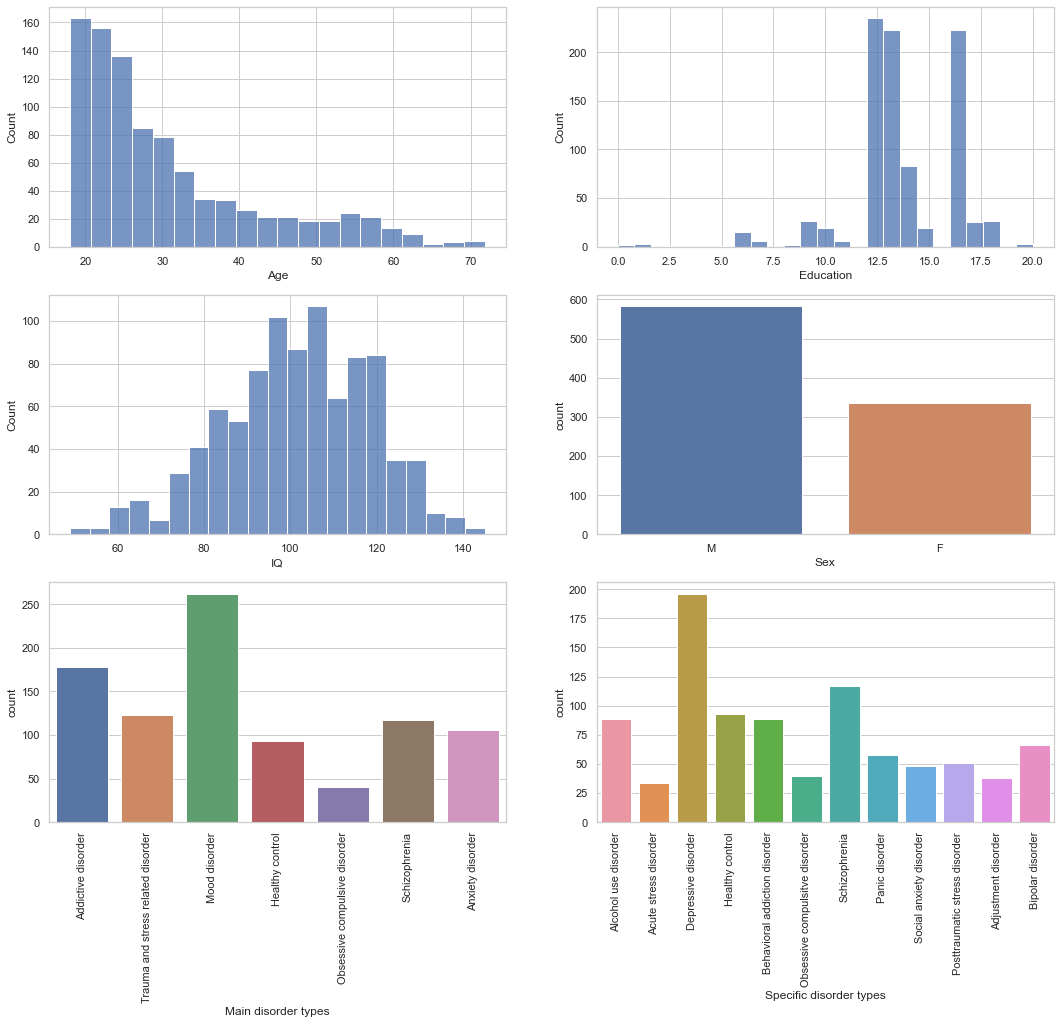

In [31]:
# Plot distributions of non-EEG features
fig, axs = plt.subplots(3,2, figsize=(18,15))
sns.histplot(ax=axs[0,0], data=df_1['age'])
axs[0,0].set_xlabel(xlabel='Age')
sns.histplot(ax=axs[0,1], data=df_1['education'])
axs[0,1].set_xlabel(xlabel='Education')
sns.histplot(ax=axs[1,0], data=df_1['IQ'])
sns.countplot(ax=axs[1,1], data=df_1, x='sex')
axs[1,1].set_xlabel(xlabel='Sex')
sns.countplot(ax=axs[2,0], data=df_1, x='main.disorder')
axs[2,0].tick_params(axis='x', labelrotation=90)
axs[2,0].set_xlabel(xlabel='Main disorder types')
sns.countplot(ax=axs[2,1], data=df_1, x='specific.disorder')
axs[2,1].tick_params(axis='x', rotation=90)
axs[2,1].set_xlabel(xlabel='Specific disorder types')
plt.show();

#### EEG Data Distribution

Since there are more than 1000 different features of EEG recordings, it is impossible to plot out all the distributions. Therefore, we decided to group the data by the places where they were recorded and frequencies and plot the distribution of means. 

In [32]:
# Group EEG recordings by recording place and frequencies
AB_A_delta = df_1.filter(regex='AB.A.delta')
AB_B_theta = df_1.filter(regex='AB.B.theta')
AB_C_alpha = df_1.filter(regex='AB.C.alpha')
AB_D_beta = df_1.filter(regex='AB.D.beta')
AB_E_highbeta = df_1.filter(regex='AB.E.highbeta')
AB_F_gamma = df_1.filter(regex='AB.F.gamma')
COH_A_delta = df_1.filter(regex='COH.A.delta')
COH_B_theta = df_1.filter(regex='COH.B.theta')
COH_C_alpha = df_1.filter(regex='COH.C.alpha')
COH_D_beta = df_1.filter(regex='COH.D.beta')
COH_E_highbeta = df_1.filter(regex='COH.E.highbeta')
COH_F_gamma = df_1.filter(regex='COH.F.gamma')

# Calculate the means of each row in every dataframe
AB_A_delta_mean = AB_A_delta.mean(axis=1)
AB_B_theta_mean = AB_B_theta.mean(axis=1)
AB_C_alpha_mean = AB_C_alpha.mean(axis=1)
AB_D_beta_mean = AB_D_beta.mean(axis=1)
AB_E_highbeta_mean = AB_E_highbeta.mean(axis=1)
AB_F_gamma_mean = AB_F_gamma.mean(axis=1)
COH_A_delta_mean = COH_A_delta.mean(axis=1)
COH_B_theta_mean = COH_B_theta.mean(axis=1)
COH_C_alpha_mean = COH_C_alpha.mean(axis=1)
COH_D_beta_mean = COH_D_beta.mean(axis=1)
COH_E_highbeta_mean = COH_E_highbeta.mean(axis=1)
COH_F_gamma_mean = COH_F_gamma.mean(axis=1)

list_of_means = [AB_A_delta_mean, AB_B_theta_mean, AB_C_alpha_mean, AB_D_beta_mean, AB_E_highbeta_mean, AB_F_gamma_mean,
                 COH_A_delta_mean, COH_B_theta_mean, COH_C_alpha_mean, COH_D_beta_mean, COH_E_highbeta_mean, COH_F_gamma_mean]
list_of_means_names = ['AB_A_delta_mean', 'AB_B_theta_mean', 'AB_C_alpha_mean', 'AB_D_beta_mean', 'AB_E_highbeta_mean', 'AB_F_gamma_mean',
                       'COH_A_delta_mean', 'COH_B_theta_mean', 'COH_C_alpha_mean', 'COH_D_beta_mean', 'COH_E_highbeta_mean', 'COH_F_gamma_mean']

Text(0.02, 0.5, 'Counts')

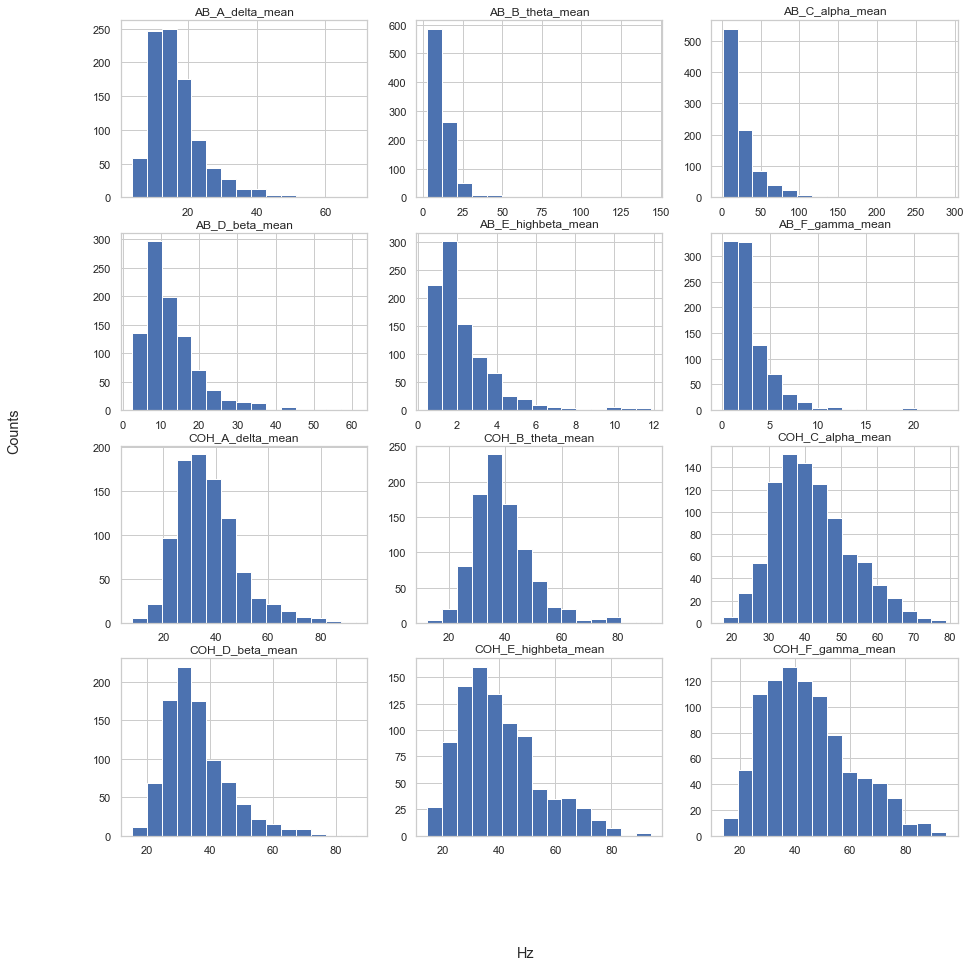

In [33]:
fig, axs = plt.subplots(4, 3, figsize=(15, 15))
for i in range(len(list_of_means)):
    axs.flat[i].hist(list_of_means[i], bins=15)
    axs.flat[i].set_title(list_of_means_names[i])
fig.supxlabel('Hz')
fig.supylabel('Counts')

Checking the distribution of sex within the disorders

In [36]:
from functools import partial
countplots = partial(sns.catplot, data=df_1, kind='count', col_wrap=3)

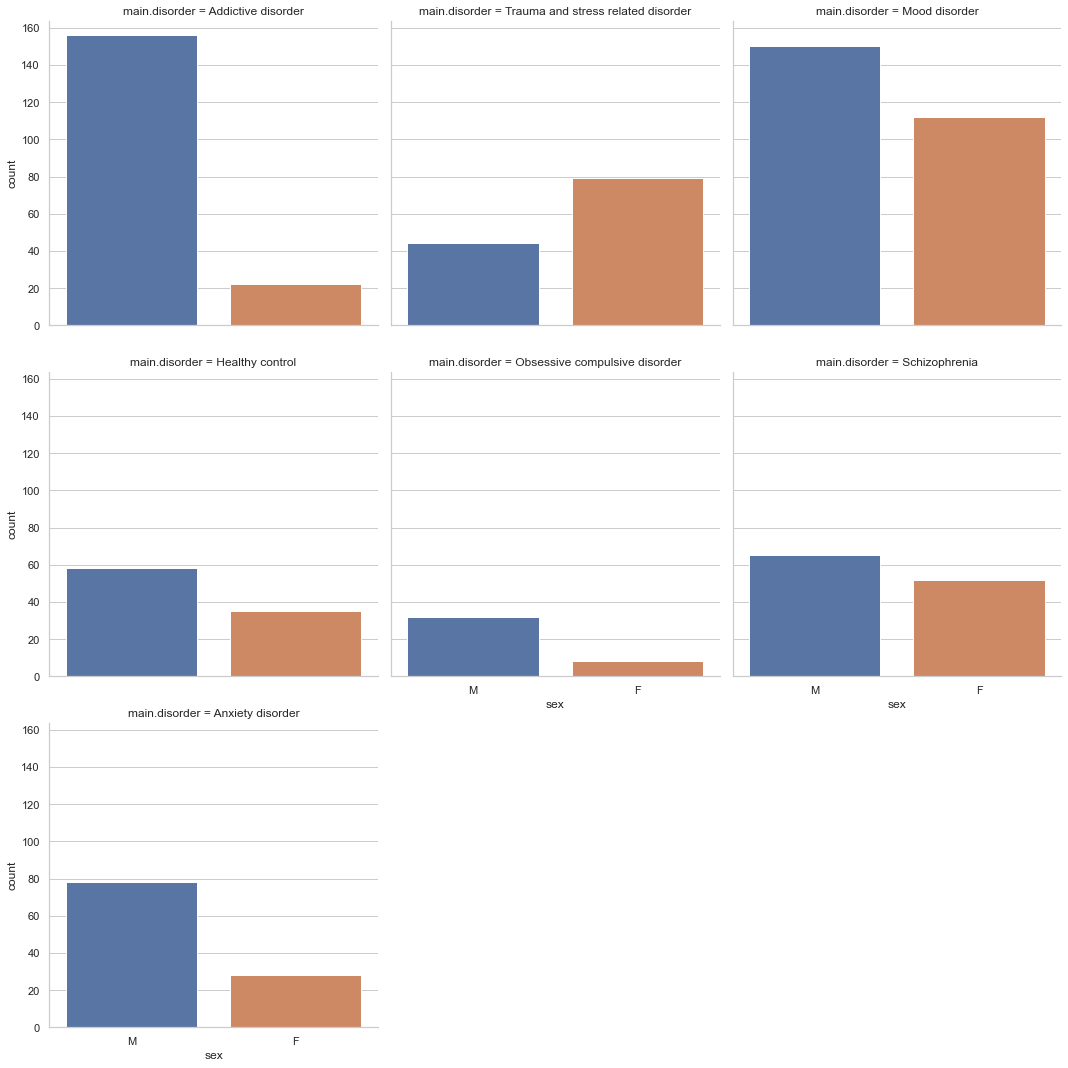

In [37]:
countplots(x='sex', col='main.disorder', col_wrap=3)
plt.show()

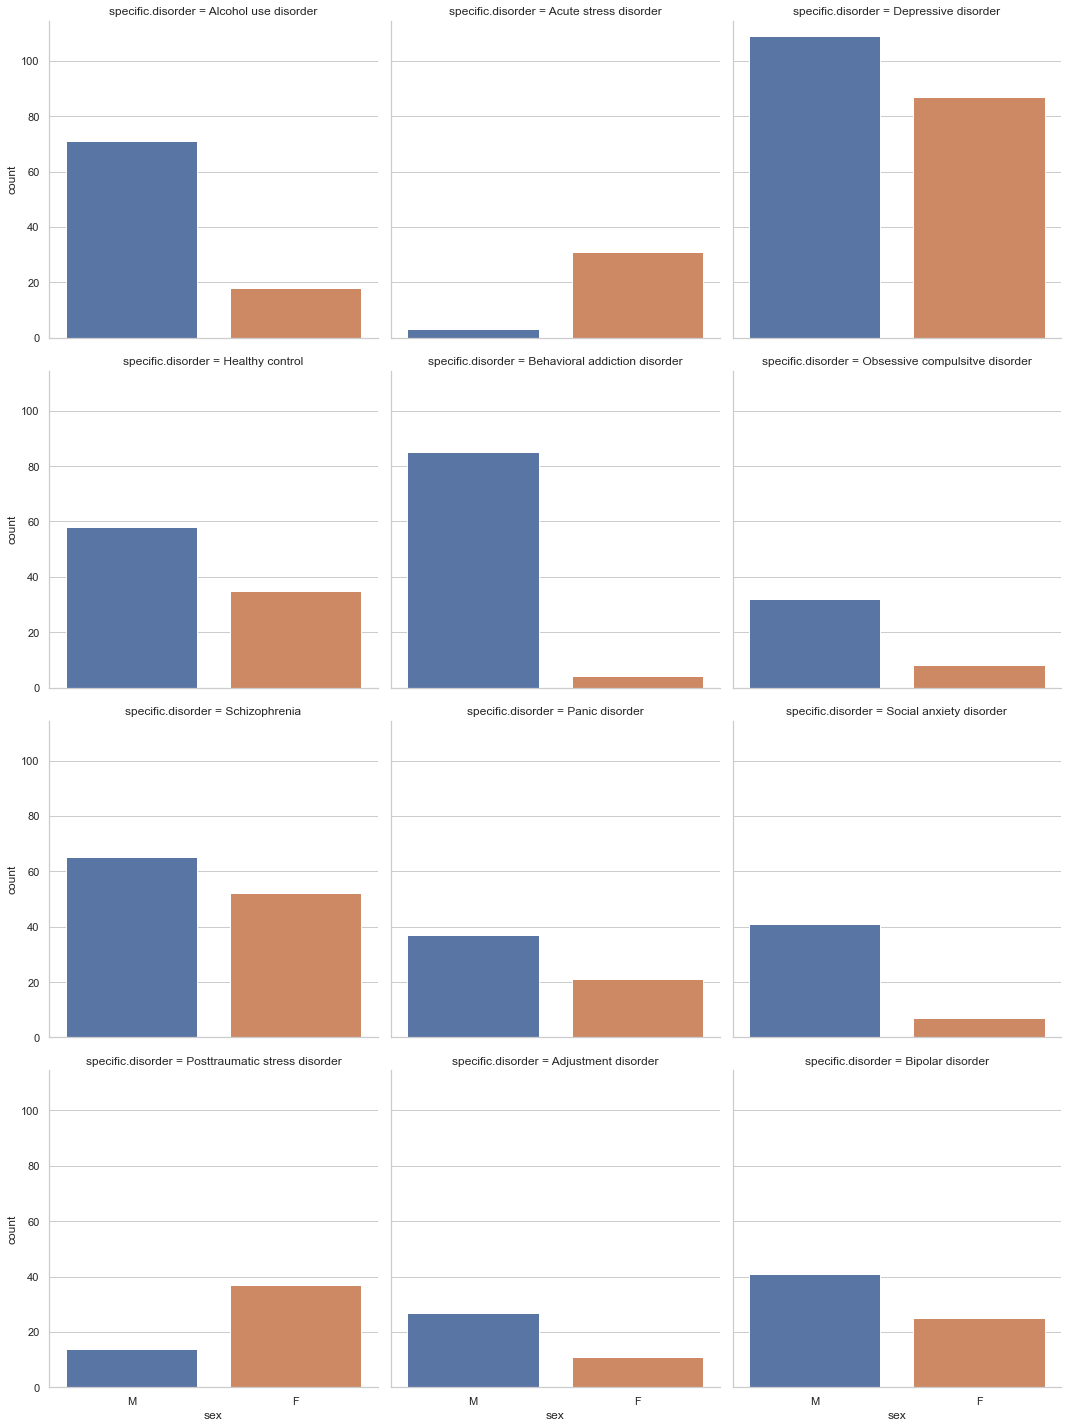

In [38]:
countplots(x='sex', col='specific.disorder', col_wrap=3)
plt.show()

### df_2 columns

In [68]:
df_2.columns
#print(df_2.columns.tolist())

Index(['Fc5.', 'Fc3.', 'Fc1.', 'Fcz.', 'Fc2.', 'Fc4.', 'Fc6.', 'C5..', 'C3..',
       'C1..', 'Cz..', 'C2..', 'C4..', 'C6..', 'Cp5.', 'Cp3.', 'Cp1.', 'Cpz.',
       'Cp2.', 'Cp4.', 'Cp6.', 'Fp1.', 'Fpz.', 'Fp2.', 'Af7.', 'Af3.', 'Afz.',
       'Af4.', 'Af8.', 'F7..', 'F5..', 'F3..', 'F1..', 'Fz..', 'F2..', 'F4..',
       'F6..', 'F8..', 'Ft7.', 'Ft8.', 'T7..', 'T8..', 'T9..', 'T10.', 'Tp7.',
       'Tp8.', 'P7..', 'P5..', 'P3..', 'P1..', 'Pz..', 'P2..', 'P4..', 'P6..',
       'P8..', 'Po7.', 'Po3.', 'Poz.', 'Po4.', 'Po8.', 'O1..', 'Oz..', 'O2..',
       'Iz..'],
      dtype='object')

Average Power across all bands for each electrode:

Showing example process for FC5 electrode:

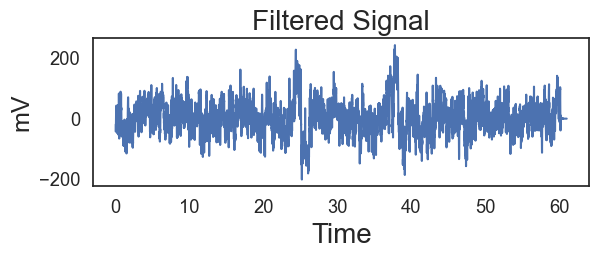

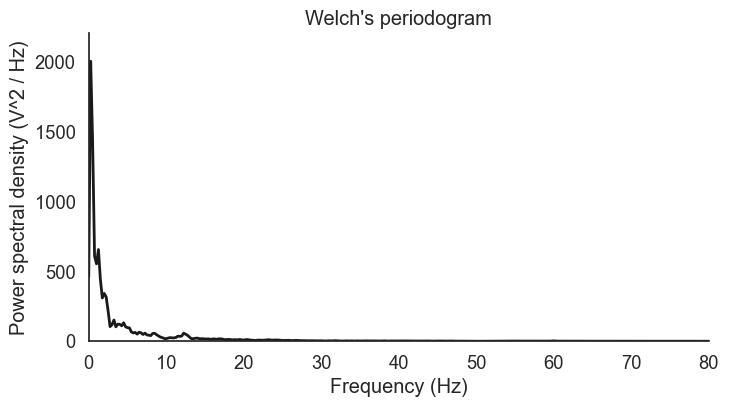

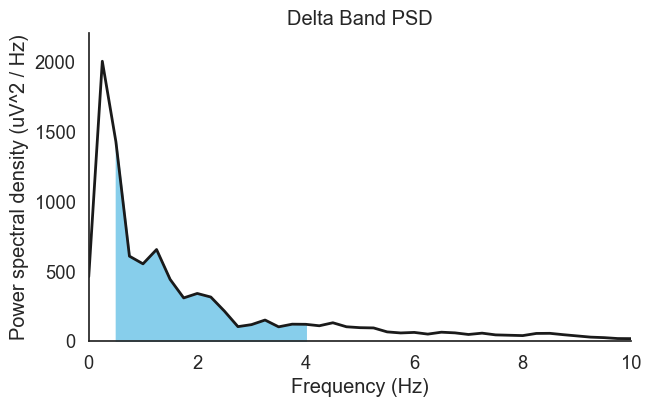

Absolute delta power: 1183.860 uV^2


In [71]:
from scipy import signal
from scipy.integrate import simps


def average_power_graph(data):
    fs = 160 #hz
    s = len(df_2)
    n = np.linspace(0, ts, num = s)
    
    #filter powerline noise at 50 hz
    f0 = 50 
    Q = 30.0
    b, a = signal.iirnotch(f0, Q, fs)
    filtered_signal = signal.filtfilt(b, a, data)
    plt.subplot(212)
 
    # Plot output signal of notch filter
    plt.plot(n, filtered_signal)
    plt.xlabel('Time', fontsize=20)
    plt.ylabel('mV', fontsize=18)
    plt.title('Filtered Signal', fontsize=20)
    plt.subplots_adjust(hspace=0.5)
    fig.tight_layout()
    plt.show()
    
    
    win = 4 * fs
    freqs, psd = signal.welch(filtered_signal, fs, nperseg=win)

    # Plot the power spectrum
    sns.set(font_scale=1.2, style='white')
    plt.figure(figsize=(8, 4))
    plt.plot(freqs, psd, color='k', lw=2)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power spectral density (V^2 / Hz)')
    plt.ylim([0, psd.max() * 1.1])
    plt.title("Welch's periodogram")
    plt.xlim([0, freqs.max()])
    sns.despine()
    
    
    #delta band
    low, high = 0.5, 4

    # Find intersecting values in frequency vector
    idx_delta = np.logical_and(freqs >= low, freqs <= high)

    # Plot the power spectral density and fill the delta area
    plt.figure(figsize=(7, 4))
    plt.plot(freqs, psd, lw=2, color='k')
    plt.fill_between(freqs, psd, where=idx_delta, color='skyblue')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power spectral density (uV^2 / Hz)')
    plt.xlim([0, 10])
    plt.ylim([0, psd.max() * 1.1])
    plt.title("Delta Band PSD")
    sns.despine()
    plt.show()

    # Frequency resolution
    freq_res = freqs[1] - freqs[0]  # = 1 / 4 = 0.25

    # Compute the absolute power by approximating the area under the curve
    delta_power = simps(psd[idx_delta], dx=freq_res)
    print('Absolute delta power: %.3f uV^2' % delta_power)

average_power_graph(df_2["C1.."])

C:\Users\maxgj\AppData\Local\Temp\ipykernel_17596\2915192306.py:40: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_powers.mean().plot(kind='bar', xlabel='Frequency Bands', ylabel='Average Band power uV^2', title='Average Power For Bands Across Electrodes')


<Axes: title={'center': 'Average Power For Bands Across Electrodes'}, xlabel='Frequency Bands', ylabel='Average Band power uV^2'>

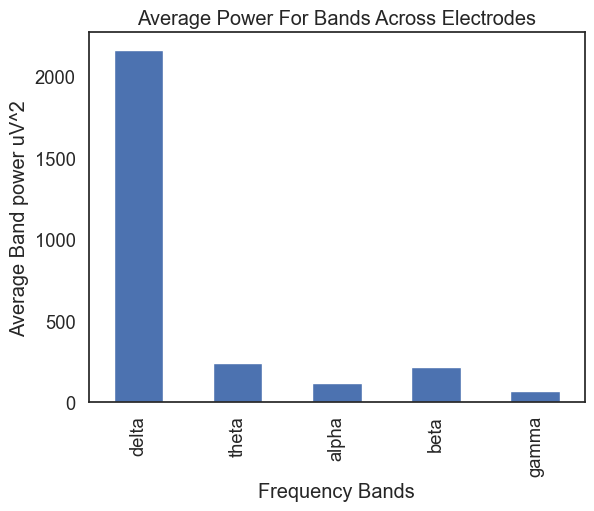

In [106]:
def average_power(data, low, high, band):
    fs = 160 #hz
    s = len(df_2)
    n = np.linspace(0, ts, num = s)
    
    #filter powerline noise at 50 hz
    f0 = 50 
    Q = 30.0
    b, a = signal.iirnotch(f0, Q, fs)
    filtered_signal = signal.filtfilt(b, a, data)
 
    win = 4 * fs
    freqs, psd = signal.welch(filtered_signal, fs, nperseg=win)

    #band
    # Find intersecting values in frequency vector
    idx_band = np.logical_and(freqs >= low, freqs <= high)
    # Frequency resolution
    freq_res = freqs[1] - freqs[0]  # = 1 / 4 = 0.25
    # Compute the absolute power by approximating the area under the curve
    band_power = simps(psd[idx_band], dx=freq_res)
    
    return band_power
    
average_powers = []

for idx in range(len(df_2.columns)):
    electrode = df_2.columns[idx]
    delta = average_power(df_2[electrode], .1, 4.0, 'Delta')
    theta = average_power(df_2[electrode], 4.0, 8.0, 'Theta')
    alpha = average_power(df_2[electrode], 8.0, 12.0, 'Alpha')
    beta = average_power(df_2[electrode], 12.0, 30.0, 'Beta')
    gamma = average_power(df_2[electrode], 30.0, 100.0, 'Gamma')
    
    
    average_powers.append([electrode, delta, theta, alpha, beta, gamma])
    
df_powers = pd.DataFrame(data=average_powers, columns = ['electrode', 'delta', 'theta', 'alpha', 'beta', 'gamma'])

df_powers.mean().plot(kind='bar', xlabel='Frequency Bands', ylabel='Average Band power uV^2', title='Average Power For Bands Across Electrodes')

    

# Results

We've transitioned to using a different dataset as a comparison for our control variable due to difficulties with extracting data from our initial chosen dataset. We have begun the process of exploring the data with regards to finding the most optimal way to split up the datasets so that the can be properly compared. While this was something we thought might be simple at first, we realized that differences in the number of electrodes, sampling rates, and even file formats have made us stop to consider the best methodology going forwards.

In order to properly attempt to prove our hypothesis, our next steps will involve separating the data from df_1 into dataframes specific to each given psychiatric illness. Next, we will need to locate the best methodology for reading and comparing the data from df_2 as a reference to df_1. We will then be in a position to confidently determine the validity of our hypothesis as to what extent we can determine one's psychiatric illness from EEG recording data. While this is a rather inconclusive point to be at currently, we're focusing on making sure that we develop a proper understanding of the data we're working with. Rushing into this haphazardly will only result in more headaches as we scramble to clean the data further down the line, which we are aiming to avoid at all costs.